# DATOS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_solar = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/results/df_solar.csv')

In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435845 entries, 0 to 435844
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DATE_TIME            435845 non-null  object 
 1   AMBIENT_TEMPERATURE  435845 non-null  float64
 2   MODULE_TEMPERATURE   435845 non-null  float64
 3   WIND_SPEED           435798 non-null  float64
 4   IRRADIATION          435845 non-null  float64
 5   DC_POWER             435845 non-null  float64
 6   DC_CURRENT           435845 non-null  float64
 7   SEASON               435845 non-null  int64  
 8   Day                  435845 non-null  int64  
 9   DATE                 435845 non-null  object 
 10  TIME                 435845 non-null  object 
 11  DAY                  435845 non-null  int64  
 12  MONTH                435845 non-null  int64  
 13  HOURS                435845 non-null  int64  
 14  MINUTES              435845 non-null  int64  
 15  TOTAL MINUTES PAS

In [ ]:
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])

In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435845 entries, 0 to 435844
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype                    
---  ------               --------------   -----                    
 0   DATE_TIME            435845 non-null  datetime64[ns, UTC-05:00]
 1   AMBIENT_TEMPERATURE  435845 non-null  float64                  
 2   MODULE_TEMPERATURE   435845 non-null  float64                  
 3   WIND_SPEED           435798 non-null  float64                  
 4   IRRADIATION          435845 non-null  float64                  
 5   DC_POWER             435845 non-null  float64                  
 6   DC_CURRENT           435845 non-null  float64                  
 7   SEASON               435845 non-null  int64                    
 8   Day                  435845 non-null  int64                    
 9   DATE                 435845 non-null  object                   
 10  TIME                 435845 non-null  object            

In [ ]:
df_solar[df_solar[ ['IRRADIATION' ] ] < 0.001].groupby(df_solar['DATE_TIME'].dt.hour) [['IRRADIATION']].count()

,IRRADIATION
DATE_TIME,
0,16817
1,16175
2,16597
3,16348
4,14463
5,8020
6,3634
7,302
8,0


In [ ]:
df_solar = df_solar.fillna(0)


In [ ]:
df_solar.isnull().sum()

,0
DATE_TIME,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
WIND_SPEED,0
IRRADIATION,0
DC_POWER,0
DC_CURRENT,0
SEASON,0
Day,0
DATE,0


In [ ]:
df2 = df_solar.copy()
X= df2[['DATE_TIME', 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','WIND_SPEED','SEASON']]
y = df2[['IRRADIATION']]

In [ ]:
X.iloc[1000:1100]

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,WIND_SPEED,SEASON
1000,2017-01-20 19:32:00-05:00,7.887,7.358,0.6,2
1001,2017-01-20 19:33:00-05:00,7.888,7.361,0.4,2
1002,2017-01-20 19:34:00-05:00,7.912,7.364,0.7,2
1003,2017-01-20 19:35:00-05:00,7.912,7.366,0.9,2
1004,2017-01-20 19:36:00-05:00,7.884,7.367,0.7,2
...,...,...,...,...,...
1095,2017-01-20 21:16:00-05:00,7.856,7.475,0.8,2
1096,2017-01-20 21:17:00-05:00,7.835,7.474,2.3,2
1097,2017-01-20 21:18:00-05:00,7.814,7.467,1.1,2
1098,2017-01-20 21:19:00-05:00,7.791,7.464,1.6,2


In [ ]:
y.iloc[1000:1100]

,IRRADIATION
1000,0.000352
1001,0.000305
1002,0.000305
1003,0.000305
1004,0.000305
...,...
1095,0.000315
1096,0.000314
1097,0.000312
1098,0.000364


In [ ]:
from sklearn.model_selection import train_test_split
X_regresor= df2[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','WIND_SPEED','SEASON']]
y_regresor = df2[['IRRADIATION']]
X_train,X_test,y_train,y_test = train_test_split(X_regresor,y_regresor,test_size=.2,random_state=21)

# REGRESION LINEAL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 90.2244%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  89.15 %


# RANDOM FOREST

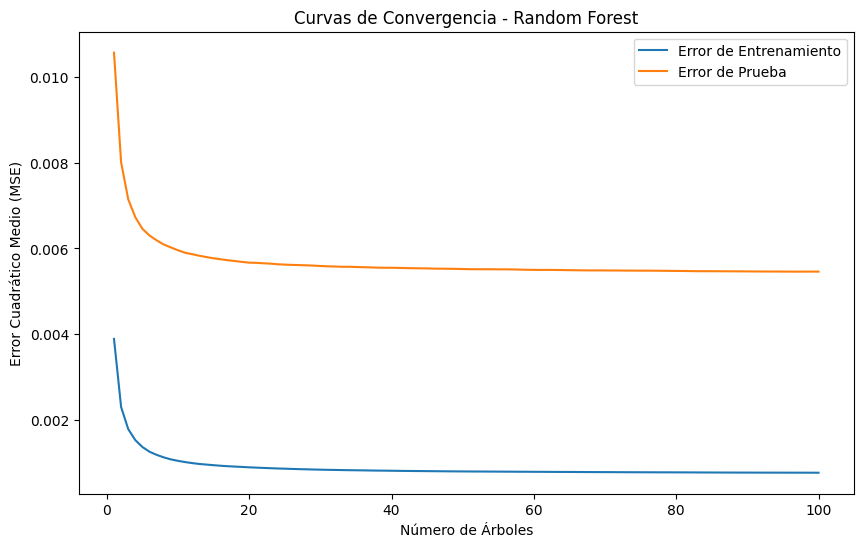

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de RandomForest con un número elevado de árboles
rfr = RandomForestRegressor(n_estimators=50, warm_start=True, random_state=42)

# Inicializar listas para almacenar los errores
train_errors = []
test_errors = []

# Iterar sobre los árboles agregando cada vez uno más
for i in range(1, 101):
    rfr.set_params(n_estimators=i)
    rfr.fit(X_train, y_train)

    # Predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = rfr.predict(X_train)
    y_test_pred = rfr.predict(X_test)

    # Calcular el error cuadrático medio
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))




In [ ]:
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  92.22 %


# SARIMA

# PREDICCION DE RESULTADOS CON RANDOM FOREST

In [ ]:
X_test.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,WIND_SPEED,SEASON
333998,21.420,27.330,0.5,1
23070,-7.025,-6.160,2.0,2
28538,6.870,4.165,8.0,2
266661,23.700,19.730,0.4,4
1283,7.937,7.928,1.2,2


In [ ]:
prediction =rfr.predict(X_test)
print(prediction)

[0.1311192  0.03397899 0.00043972 ... 0.01901511 0.1832828  0.1082979 ]


In [ ]:
cross_checking1 = pd.DataFrame({'Actual': y_test.iloc[:, 0], 'Predicted': prediction}) # Removed the extra index [:, 0] from prediction
cross_checking1.head()

,Actual,Predicted
333998,0.184200,0.131119
23070,0.033430,0.033979
28538,0.000460,0.000440
266661,0.000437,0.000877
1283,0.000322,0.002403


In [ ]:
cross_checking = pd.DataFrame({'Actual': y_test.iloc[:, 0], 'Predicted': prediction})
cross_checking.head()

,Actual,Predicted
333998,0.184200,0.131119
23070,0.033430,0.033979
28538,0.000460,0.000440
266661,0.000437,0.000877
1283,0.000322,0.002403


In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
333998,0.184200,0.131119,0.053081
23070,0.033430,0.033979,-0.000549
28538,0.000460,0.000440,0.000020
266661,0.000437,0.000877,-0.000440
1283,0.000322,0.002403,-0.002081


In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
297017,0.574300,0.587715,-0.013415
176078,0.976000,0.961200,0.014800
135626,0.640600,0.582732,0.057868
12252,0.283000,0.300992,-0.017992
273321,0.000495,0.000656,-0.000161
161324,0.000406,0.001234,-0.000828
314742,0.000576,0.000920,-0.000344
406897,0.000550,0.000709,-0.000159
71506,0.087200,0.116294,-0.029094
130321,0.000405,0.000426,-0.000021


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = rfr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE (SIN Optuna):", mae)
print("RMSE (SIN Optuna):", rmse1)
print("R2 Score (SIN Optuna):", r2)

MAE (SIN Optuna): 0.03519488975577049
RMSE (SIN Optuna): 0.07388251994907917
R2 Score (SIN Optuna): 0.9273729232624497


In [ ]:
rmse_percentage1 = (rmse1 / y_test.mean()) * 100
print(f"RMSE como porcentaje de la media: {rmse_percentage1['IRRADIATION']:.2f}%")

RMSE como porcentaje de la media: 39.09%


# VISUALIZAR CORRELACIONES



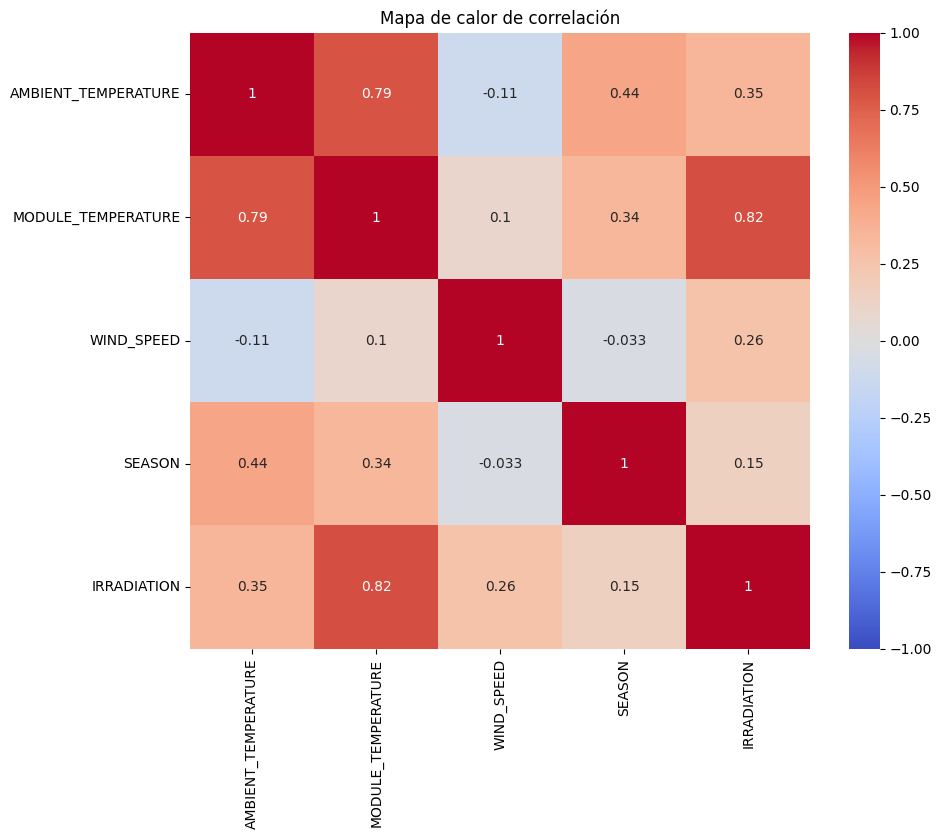

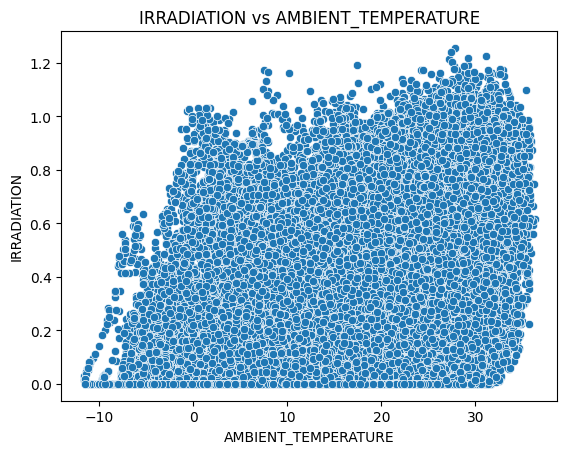

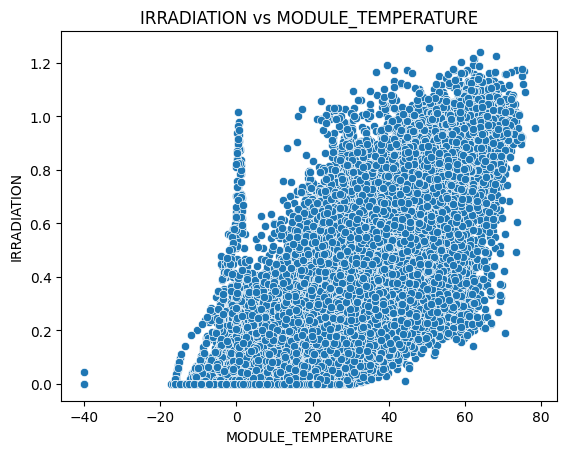

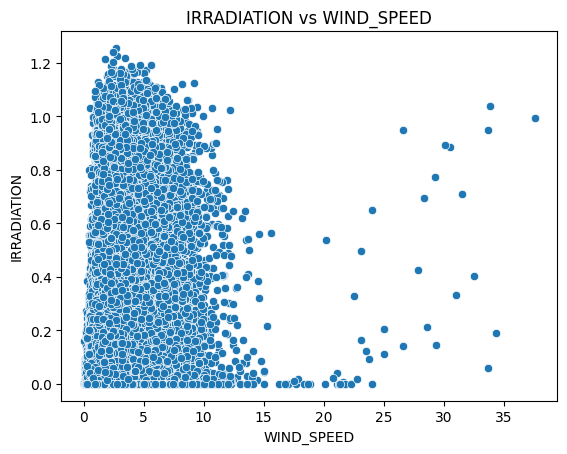

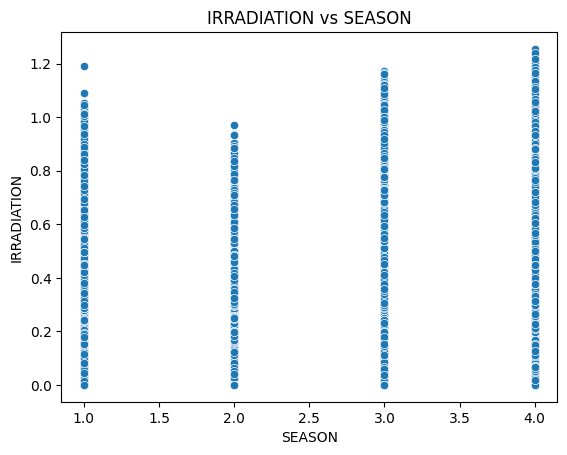

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combinar X_test y y_test en un solo DataFrame
df_corr = X_test.copy()
df_corr['IRRADIATION'] = y_test['IRRADIATION']  # Agregar la variable objetivo

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de calor de correlación")
plt.show()

# Graficos de dispersión entre cada variable independiente y AC_POWER
for col in X_test.columns:
    plt.figure()
    sns.scatterplot(x=df_corr[col], y=df_corr['IRRADIATION'])
    plt.title(f"IRRADIATION vs {col}")
    plt.xlabel(col)
    plt.ylabel("IRRADIATION")
    plt.show()


# OPTIMIZACION DE DATOS E HIPERPARAMETROS


Se puede obervar que existen casos donde la irradiancia es mayor a 0, y el valor de DC_POWER es 0

**Optuna**

In [ ]:
pip install optuna

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

def objective(trial):
    # Definir los hiperparámetros que Optuna optimizará
    max_depth = trial.suggest_int("max_depth", 5, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    # Crear el modelo con los hiperparámetros propuestos
    rfr = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        criterion='squared_error',
        splitter='best',
        max_features=None,
        min_impurity_decrease=0.0,
        ccp_alpha=0.0
    )

    # Entrenar el modelo
    rfr.fit(X_train, y_train)

    # Predicciones y cálculo del RMSE
    y_pred = rfr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Usar RMSE

    return rmse


# Ejecutar Optuna para la optimización
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros y MAE
best_params = study.best_params
best_rmse = study.best_value

print("Mejores hiperparámetros (Optuna):", best_params)
print("Mejor RMSE (Optuna):", best_rmse)

# Re-train the model with the best parameters and predict on the test set
best_model = DecisionTreeRegressor(**best_params)  # Create model with best params
best_model.fit(X_train, y_train)                  # Train the model
y_pred = best_model.predict(X_test)               # Predict on test set


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE (Optuna):", mae)
print("R2 Score (Optuna):", r2)

[I 2024-11-20 04:51:08,042] A new study created in memory with name: no-name-695d1f0c-8ab6-45d0-a8e6-67fa6c9fc562
[I 2024-11-20 04:51:09,120] Trial 0 finished with value: 0.07963213768614798 and parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07963213768614798.
[I 2024-11-20 04:51:11,688] Trial 1 finished with value: 0.07716067883493272 and parameters: {'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.07716067883493272.
[I 2024-11-20 04:51:14,400] Trial 2 finished with value: 0.07716067883493272 and parameters: {'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.07716067883493272.
[I 2024-11-20 04:51:16,502] Trial 3 finished with value: 0.08201641572827263 and parameters: {'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.07716067883493272.
[I 2024-11-20 04:51:20,951] Trial 4 finished with value

Mejores hiperparámetros (Optuna): {'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 5}
Mejor RMSE (Optuna): 0.076556750371172
MAE (Optuna): 0.04017701173167331
R2 Score (Optuna): 0.9220201948591813


In [ ]:
rmse_percentage = (best_rmse / y_test.mean()) * 100
print(f"RMSE como porcentaje de la media: {rmse_percentage['IRRADIATION']:.2f}%")


RMSE como porcentaje de la media: 40.50%


**GRID SEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definir el modelo y los rangos de hiperparámetros para GridSearch
param_grid = {
    'max_depth': range(5, 31, 5),
    'min_samples_split': range(2, 11, 2),
    'min_samples_leaf': range(1, 6)
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Minimizar el RMSE
    cv=5,                                   # Validación cruzada con 5 particiones
    n_jobs=-1, # Utilizar todos los núcleos disponibles
    verbose=2,  # Mostrar mensajes de progreso
    refit=True,  # Re-entrenar el modelo con los mejores hiperparámetros
    return_train_score=True,  # Devolver el puntaje de entrenamiento
    error_score='raise',  # Manejar errores
    pre_dispatch='2*n_jobs',  # Paralelizar el ajuste de hiperparámetros

)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y RMSE
best_params_grid = grid_search.best_params_
best_rmse_grid = -grid_search.best_score_

print("Mejores hiperparámetros (GridSearchCV):", best_params_grid)
print("Mejor RMSE (GridSearchCV):", best_rmse_grid)

# Reentrenar el modelo con los mejores parámetros de GridSearch y hacer predicciones
best_model_grid = DecisionTreeRegressor(**best_params_grid)
best_model_grid.fit(X_train, y_train)
y_pred_grid = best_model_grid.predict(X_test)

# Calcular MAE y R2 Score
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print("MAE (GridSearchCV):", mae_grid)
print("R2 Score (GridSearchCV):", r2_grid)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Mejores hiperparámetros (GridSearchCV): {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 8}
Mejor RMSE (GridSearchCV): 0.07754584626286752
MAE (GridSearchCV): 0.041629877202842724
R2 Score (GridSearchCV): 0.9204145930157882


In [ ]:
import os

# Crear la carpeta 'output'
os.makedirs('output', exist_ok=True)

# Crear un DataFrame con los resultados
results = pd.DataFrame([best_params])
results['RMSE'] = best_rmse

# Guardar en CSV
results.to_csv("output/hyperparameter_optimization_results.csv", index=False)



In [ ]:
prediction_normal=rfr.predict(X_test)
prediction_optuna = best_model.predict(X_test)
prediction_grid = best_model_grid.predict(X_test)

In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test['IRRADIATION'] , 'Predicted_normal' : prediction_normal, 'Predicted_optuna' : prediction_optuna, 'Predicted_grid' : prediction_grid})
cross_checking.iloc[1002:1012]

,Actual,Predicted_normal,Predicted_optuna,Predicted_grid
122040,0.045960,0.042884,0.071259,0.051586
317014,0.000433,0.008222,0.007960,0.005212
347138,0.000441,0.001979,0.007684,0.011189
186657,0.548200,0.354860,0.379548,0.395429
358066,0.015680,0.005043,0.005813,0.007645
70386,0.487400,0.410425,0.467887,0.444186
305201,0.152800,0.189355,0.217112,0.210020
418440,0.159400,0.150405,0.138060,0.142519
404476,0.000282,0.002907,0.006535,0.007421
263717,0.055670,0.086778,0.101936,0.107665


In [ ]:
import numpy as np

# Calcular los errores en porcentaje con manejo de divisiones donde Actual - Predicted es 0
cross_checking['Error_normal'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_normal'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_normal']) * 100 / cross_checking['Actual']
)

cross_checking['Error_optuna'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_optuna'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_optuna']) * 100 / cross_checking['Actual']
)

cross_checking['Error_grid'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_grid'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_grid']) * 100 / cross_checking['Actual']
)

# Aplicar formato de estilo con un gradiente de color personalizado para resaltar errores altos en rojo
cross_checking.sample(25).style.background_gradient(
    cmap='coolwarm', subset=['Error_normal', 'Error_optuna', 'Error_grid']
).set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'DarkBlack',
    'font-size': '15px'
})


,Actual,Predicted_normal,Predicted_optuna,Predicted_grid,Error_normal,Error_optuna,Error_grid
93541,0.907000,0.891361,0.879179,0.911636,1.724256,3.067388,0.511122
376598,0.052070,0.049237,0.085605,0.018610,5.440369,64.403775,64.259027
63190,0.353000,0.404244,0.410163,0.421157,14.516714,16.193366,19.307810
428333,0.000649,0.000551,0.015700,0.023963,15.060092,2319.152472,3592.251320
69898,0.000476,0.003492,0.005813,0.007645,633.556723,1121.216009,1506.094834
80874,0.393500,0.349177,0.137906,0.116522,11.263741,64.953924,70.388237
19573,0.000425,0.002599,0.009149,0.007656,511.437647,2052.618548,1701.433914
253959,1.148000,0.750965,0.791085,0.785978,34.584930,31.090196,31.535045
248174,0.044410,0.000552,0.012623,0.007739,98.755933,71.575650,82.572718
378046,0.277800,0.293627,0.330404,0.319691,5.697264,18.936017,15.079570


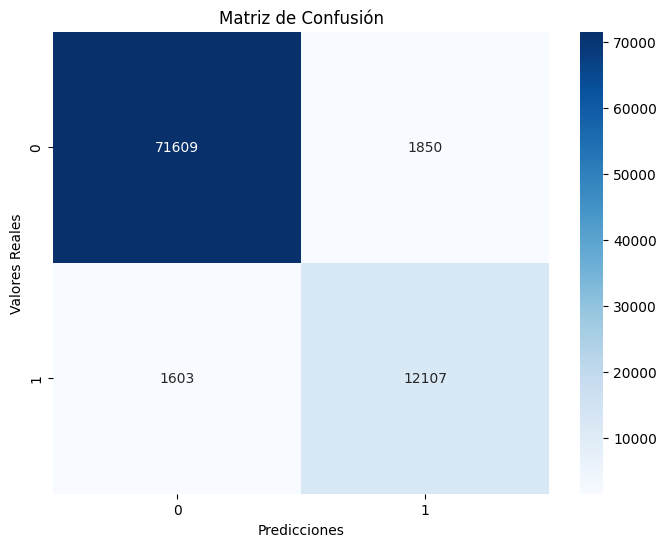

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predecir los valores de prueba para la primera columna
y_pred_rfr = rfr.predict(X_test)

# Definir un umbral para categorizar las predicciones y los valores reales
threshold = 0.5  # Ajusta este valor según tus datos

# Convertir las predicciones y los valores reales en 0 y 1 (por ejemplo)
# Usando la primera columna de y_test
y_test_categorized = np.where(y_test > threshold, 1, 0)
y_pred_categorized = np.where(y_pred_rfr > threshold, 1, 0)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test_categorized, y_pred_categorized)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

# **GUARDAR MODELO**

In [ ]:
import joblib


# Guardar el modelo
#joblib.dump(rfr, 'rfr.pkl')
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(best_model_grid, 'best_model_grid.pkl')
# Guardar los datos
pd.to_pickle(X_train, 'X_train.pkl')
pd.to_pickle(X_test, 'X_test.pkl')
pd.to_pickle(y_train, 'y_train.pkl')
pd.to_pickle(y_test, 'y_test.pkl')



In [ ]:
joblib.dump(rfr, 'rfr.pkl')

['rfr.pkl']